In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json
import transformers

In [148]:
# review_f = "sb_post_emotion_classification.json"

In [209]:
filepath_business = "../yelp_dataset/yelp_academic_dataset_business.json"
all_restaurants = []
all_reviews = []
def getReviewsChinesePrePandemic():
    before_reviews = []
    start_date = "2020-02"
    key_words = set(['Chinese'])

    chinese_restaurants = set()
    with open(filepath_business, 'r', encoding="utf8") as file:
        for line in file:
            biz = json.loads(line)
            categories = biz.get('categories', [])
            if categories:
                if not(any(word in categories for word in key_words)):
                    chinese_restaurants.add(biz['business_id'])

    with open(filepath_review, 'r', encoding="utf8") as file:
        for line in file:
            review = json.loads(line)
            for r in review:
                if r['business_id'] in chinese_restaurants and r.get('date', '') < start_date:
                    before_reviews.append(r)

    with open("pre_covid_"+review_f, "w") as outfile:
        json.dump(before_reviews, outfile)
        
        
def getReviewsChinesePostPandemic():
    after_reviews = []
    start_date = "2020-02"
    key_words = set(['Chinese'])

    chinese_restaurants = set()
    with open(filepath_business, 'r', encoding="utf8") as file:
        for line in file:
            biz = json.loads(line)
            categories = biz.get('categories', [])
            if categories:
                if not(any(word in categories for word in key_words)):
                    chinese_restaurants.add(biz['business_id'])

    with open(filepath_review, 'r', encoding="utf8") as file:
        for line in file:
            review = json.loads(line)
            for r in review:
                if r['business_id'] in chinese_restaurants and r.get('date', '') >= start_date:
                    after_reviews.append(r)

    with open("post_covid_"+review_f, "w") as outfile:
        json.dump(after_reviews, outfile)
        


In [176]:
# getReviewsChinesePostPandemic()

In [210]:
cities = ['sb','new_orleans', 'indianapolis', 'tampa', 'philadelphia']
for city in cities:
    review_f = city + "_review_classification.json"
    filepath_review = "../"+review_f
    getReviewsChinesePostPandemic()
    getReviewsChinesePrePandemic()

In [187]:
review_f = 'philadelphia' + "_review_classification.json"
with open("pre_covid_chinese_"+review_f) as json_data:
    data = json.load(json_data)
    pre_city_chinese_emotion = pd.DataFrame(data)

with open("post_covid_chinese_"+review_f) as json_data:
    data = json.load(json_data)
    post_city_chinese_emotion = pd.DataFrame(data)

LABEL_1    69.827586
LABEL_0    30.172414
Name: classification, dtype: float64
LABEL_1    63.636364
LABEL_0    36.363636
Name: classification, dtype: float64


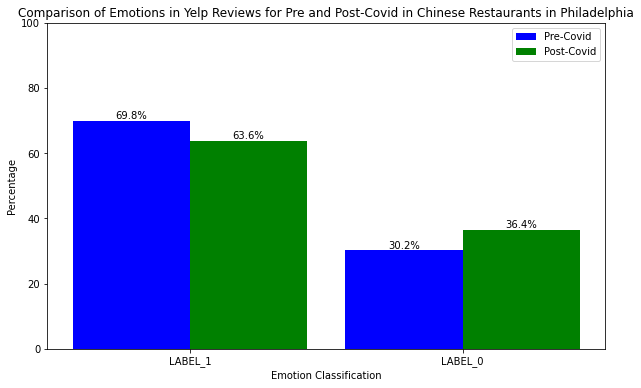

In [189]:
counts_pre = pre_city_chinese_emotion['classification'].value_counts()
total_count_pre = len(pre_city_chinese_emotion)
category_percentages_pre = counts_pre / total_count_pre * 100

counts_post = post_city_chinese_emotion['classification'].value_counts()
total_count_post = len(post_city_chinese_emotion)
category_percentages_post = counts_post / total_count_post * 100

# add_values = np.array([0])  # Modify this array with your additional values
# add_labels = np.array(['surprise'])  # Modify with your labels

# category_percentages_post = np.concatenate([category_percentages_post, add_values])
# category_labels_post = np.concatenate([counts_post.index, add_labels])

print(category_percentages_pre)
print(category_percentages_post)
bar_width = 0.43
index = np.arange(len(counts_pre.index))

plt.figure(figsize=(10, 6))

bars_pre = plt.bar(index, category_percentages_pre, bar_width, label='Pre-Covid', color='b')
bars_post = plt.bar(index + bar_width, category_percentages_post, bar_width, label='Post-Covid', color='g')

for bar, percentage in zip(bars_pre, category_percentages_pre):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 0.1, f'{percentage:.1f}%', ha='center', va='bottom')

for bar, percentage in zip(bars_post, category_percentages_post):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 0.1, f'{percentage:.1f}%', ha='center', va='bottom')

plt.xlabel('Emotion Classification')
plt.ylabel('Percentage')
plt.title('Comparison of Emotions in Yelp Reviews for Pre and Post-Covid in Chinese Restaurants in Philadelphia')
plt.xticks(index + bar_width / 2, counts_pre.index)
plt.legend()
plt.ylim(0, 100) 

plt.show()

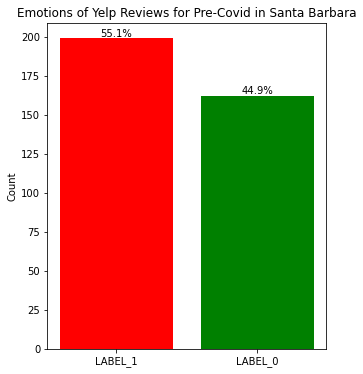

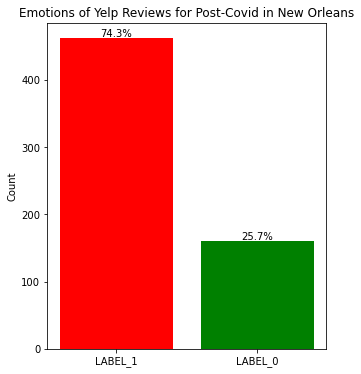

In [183]:
plt.figure(figsize=(5, 6))
counts = pre_city_chinese_emotion['classification'].value_counts()
total_count = len(pre_city_chinese_emotion)
category_percentages = counts / total_count * 100
bars = plt.bar(counts.index, counts, color=['red', 'green', 'blue', 'purple','orange','yellow'])
for bar, percentage in zip(bars, category_percentages):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.1, f'{percentage:.1f}%', ha='center', va='bottom')
plt.title('Emotions of Yelp Reviews for Pre-Covid in Santa Barbara')
plt.ylabel('Count')
plt.show()

plt.figure(figsize=(5, 6))
counts = post_city_chinese_emotion['classification'].value_counts()
total_count = len(post_city_chinese_emotion)
category_percentages = counts / total_count * 100
bars = plt.bar(counts.index, counts, color=['red', 'green', 'blue', 'purple','orange','yellow'])
for bar, percentage in zip(bars, category_percentages):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.1, f'{percentage:.1f}%', ha='center', va='bottom')
plt.title('Emotions of Yelp Reviews for Post-Covid in New Orleans')
plt.ylabel('Count')
plt.show()

In [87]:
def load_json_pre(review_f):
    with open("pre_covid_chinese_"+review_f) as json_data:
        data = json.load(json_data)
        return pd.DataFrame(data)

def load_json_post(review_f):
    with open("post_covid_chinese_"+review_f) as json_data:
        data = json.load(json_data)
        return pd.DataFrame(data)

In [171]:
from statsmodels.stats.proportion import proportions_ztest
def perform_z_test(pre_data, post_data):
    angy_pre_covid_reviews = pre_data['classification'] == 'anger'
    angy_post_covid_reviews = post_data['classification'] == 'anger'
    print(len(pre_data))
    total_pop = int((int(angy_pre_covid_reviews.sum() + angy_post_covid_reviews.sum()))/int((len(pre_data)+len(post_data))))
    stat, p_value = proportions_ztest(int(angy_pre_covid_reviews.sum()), len(pre_data), total_pop)

    print(f'Z-statistic: {stat:.4f}')
    print(f'P-value: {p_value}')

    alpha = 0.05
    if p_value < alpha:
        print("Reject the null hypothesis: There is a significant difference in the proportion of angry reviews.")
    else:
        print("Accept the null hypothesis: There is no significant difference in the proportion of angry reviews.")
        


In [172]:
cities = ['sb','new_orleans', 'indianapolis', 'tampa', 'philadelphia']
for city in cities:
    review_f = city + "_emotion_classification.json"
    pre_data = load_json_pre(review_f)
    post_data = load_json_post(review_f)
    print("TESTING " + city + " PROPORTION OF PRE VS POST COVID ANGRY REVIEWS") 
    perform_z_test(pre_data, post_data)
    

TESTING sb PROPORTION OF PRE VS POST COVID ANGRY REVIEWS
361
Z-statistic: 8.8199
P-value: 1.1452662459800805e-18
Reject the null hypothesis: There is a significant difference in the proportion of angry reviews.
TESTING new_orleans PROPORTION OF PRE VS POST COVID ANGRY REVIEWS
255
Z-statistic: 6.4744
P-value: 9.519172261499865e-11
Reject the null hypothesis: There is a significant difference in the proportion of angry reviews.
TESTING indianapolis PROPORTION OF PRE VS POST COVID ANGRY REVIEWS
359
Z-statistic: 8.1455
P-value: 3.7759048485349936e-16
Reject the null hypothesis: There is a significant difference in the proportion of angry reviews.
TESTING tampa PROPORTION OF PRE VS POST COVID ANGRY REVIEWS
256
Z-statistic: 5.1461
P-value: 2.659007726175094e-07
Reject the null hypothesis: There is a significant difference in the proportion of angry reviews.
TESTING philadelphia PROPORTION OF PRE VS POST COVID ANGRY REVIEWS
812
Z-statistic: 10.2484
P-value: 1.2034874109551174e-24
Reject the n

In [123]:
from scipy.stats import chi2_contingency


In [241]:
def chi_square_check(pre_positive, post_positive):
    a_pos, a_neg = pre_positive, 100-pre_positive
    b_pos, b_neg = post_positive, 100-post_positive
    observed_data = np.array([[a_pos, a_neg],
                            [b_pos, b_neg]])
    chi2, p, dof, expected = chi2_contingency(observed_data)
   
    print(f"Chi-Square Value: {chi2:.4f}")
    print(f"P-Value: {p}")
    # return p
    print(f"Degrees of Freedom: {dof}")
    print("Contingency Table:")
    print(expected)
    
    alpha = 0.05
    if p < alpha:
        print("Reject the null hypothesis: There is a significant difference in the proportion of angry reviews.")
    else:
        print("Accept the null hypothesis: There is no significant difference in the proportion of angry reviews.")

In [242]:
cities = ['sb','new_orleans', 'indianapolis', 'tampa', 'philadelphia']
for city in cities:
    review_f = "chinese_" + city + "_emotion_classification.json"
    pre_data = load_json_pre(review_f)
    post_data = load_json_post(review_f)
    
    angy_pre_covid_reviews = pre_data['classification'] == 'anger'
    angy_post_covid_reviews = post_data['classification'] == 'anger'
    print("-- - - -- -- ")
    print("TESTING " + city.upper() + " CHI^2 PROPORTION OF PRE VS POST COVID ANGRY REVIEWS") 
    pre = (angy_pre_covid_reviews.sum()/len(pre_data))*100
    post = (angy_post_covid_reviews.sum()/len(post_data))*100
    chi_square_check(pre, post)

-- - - -- -- 
TESTING SB CHI^2 PROPORTION OF PRE VS POST COVID ANGRY REVIEWS
Chi-Square Value: 1.0617
P-Value: 0.3028323092584634
Degrees of Freedom: 1
Contingency Table:
[[14.65204728 85.34795272]
 [14.65204728 85.34795272]]
Accept the null hypothesis: There is no significant difference in the proportion of angry reviews.
-- - - -- -- 
TESTING NEW_ORLEANS CHI^2 PROPORTION OF PRE VS POST COVID ANGRY REVIEWS
Chi-Square Value: 0.2601
P-Value: 0.6100528561059717
Degrees of Freedom: 1
Contingency Table:
[[12.42795105 87.57204895]
 [12.42795105 87.57204895]]
Accept the null hypothesis: There is no significant difference in the proportion of angry reviews.
-- - - -- -- 
TESTING INDIANAPOLIS CHI^2 PROPORTION OF PRE VS POST COVID ANGRY REVIEWS
Chi-Square Value: 0.0007
P-Value: 0.9795344469300201
Degrees of Freedom: 1
Contingency Table:
[[16.16566231 83.83433769]
 [16.16566231 83.83433769]]
Accept the null hypothesis: There is no significant difference in the proportion of angry reviews.
-- - -

In [251]:
from statsmodels.stats.proportion import proportions_ztest
def perform_z_test(pre_data, post_data):
    pre_data["classification"]= pre_data.apply(lambda x: x['classification'].replace('LABEL_1', "Positive"), axis=1)
    pre_data["classification"]= pre_data.apply(lambda x: x['classification'].replace('LABEL_0', "Negative"), axis=1)
    
    post_data["classification"]= pre_data.apply(lambda x: x['classification'].replace('LABEL_1', "Positive"), axis=1)
    post_data["classification"]= pre_data.apply(lambda x: x['classification'].replace('LABEL_0', "Negative"), axis=1)
    neg_pre_covid_reviews = pre_data['classification'] == 'Negative'
    neg_post_covid_reviews = post_data['classification'] == 'Negative'
    print(len(pre_data))
    total_pop = int((int(neg_pre_covid_reviews.sum() + neg_post_covid_reviews.sum()))/int((len(pre_data)+len(post_data))))
    stat, p_value = proportions_ztest(int(neg_post_covid_reviews.sum()), len(post_data), total_pop)

    print(f'Z-statistic: {stat:.4f}')
    print(f'P-value: {p_value}')

    alpha = 0.05
    if p_value < alpha:
        print("Reject the null hypothesis: There is a significant difference in the proportion of angry reviews.")
    else:
        print("Accept the null hypothesis: There is no significant difference in the proportion of angry reviews.")
        


In [252]:
cities = ['sb','new_orleans', 'indianapolis', 'tampa', 'philadelphia']
for city in cities:
    review_f = city + "_review_classification.json"
    pre_data = load_json_pre(review_f)
    post_data = load_json_post(review_f)
    print("TESTING " + city + " PROPORTION OF PRE VS POST COVID NEG REVIEWS") 
    perform_z_test(pre_data, post_data)
    

TESTING sb PROPORTION OF PRE VS POST COVID NEG REVIEWS
9018
Z-statistic: 7.8486
P-value: 4.208186364522717e-15
Reject the null hypothesis: There is a significant difference in the proportion of angry reviews.
TESTING new_orleans PROPORTION OF PRE VS POST COVID NEG REVIEWS
9159
Z-statistic: 11.4199
P-value: 3.3278875714782714e-30
Reject the null hypothesis: There is a significant difference in the proportion of angry reviews.
TESTING indianapolis PROPORTION OF PRE VS POST COVID NEG REVIEWS
8288
Z-statistic: 24.5757
P-value: 2.2968020455690648e-133
Reject the null hypothesis: There is a significant difference in the proportion of angry reviews.
TESTING tampa PROPORTION OF PRE VS POST COVID NEG REVIEWS
8464
Z-statistic: 18.9420
P-value: 5.1373885976300506e-80
Reject the null hypothesis: There is a significant difference in the proportion of angry reviews.
TESTING philadelphia PROPORTION OF PRE VS POST COVID NEG REVIEWS
9066
Z-statistic: 5.4160
P-value: 6.093837886153699e-08
Reject the nul

In [207]:
def chi_square_check(pre_positive, post_positive):
    a_pos, a_neg = pre_positive, 100-pre_positive
    b_pos, b_neg = post_positive, 100-post_positive
    observed_data = np.array([[a_pos, a_neg],
                            [b_pos, b_neg]])
    chi2, p, dof, expected = chi2_contingency(observed_data)
   
    print(f"Chi-Square Value: {chi2:.4f}")
    print(f"P-Value: {p}")
    # return p
    print(f"Degrees of Freedom: {dof}")
    print("Contingency Table:")
    print(expected)
    
    alpha = 0.05
    if p < alpha:
        print("Reject the null hypothesis: There is a significant difference in the proportion of angry reviews.")
    else:
        print("Accept the null hypothesis: There is no significant difference in the proportion of angry reviews.")

In [248]:
cities = ['sb','new_orleans', 'indianapolis', 'tampa', 'philadelphia']
for city in cities:
    review_f = "chinese_" + city + "_review_classification.json"
    pre_data = load_json_pre(review_f)
    post_data = load_json_post(review_f)
    
    pre_data["classification"]= pre_data.apply(lambda x: x['classification'].replace('LABEL_1', "Positive"), axis=1)
    pre_data["classification"]= pre_data.apply(lambda x: x['classification'].replace('LABEL_0', "Negative"), axis=1)
    
    post_data["classification"]= pre_data.apply(lambda x: x['classification'].replace('LABEL_1', "Positive"), axis=1)
    post_data["classification"]= pre_data.apply(lambda x: x['classification'].replace('LABEL_0', "Negative"), axis=1)
    
    angy_pre_covid_reviews = pre_data['classification'] == 'Positive'
    angy_post_covid_reviews = post_data['classification'] == 'Positive'
    print("-- - - -- -- ")
    print("TESTING " + city.upper() + " CHI^2 PROPORTION OF PRE VS POST COVID NEG REVIEWS") 
    pre = (angy_pre_covid_reviews.sum()/len(pre_data))*100
    post = (angy_post_covid_reviews.sum()/len(post_data))*100
    chi_square_check(pre, post)

-- - - -- -- 
TESTING SB CHI^2 PROPORTION OF PRE VS POST COVID NEG REVIEWS
Chi-Square Value: 8.7623
P-Value: 0.003075193242934894
Degrees of Freedom: 1
Contingency Table:
[[44.22899354 55.77100646]
 [44.22899354 55.77100646]]
Reject the null hypothesis: There is a significant difference in the proportion of angry reviews.
-- - - -- -- 
TESTING NEW_ORLEANS CHI^2 PROPORTION OF PRE VS POST COVID NEG REVIEWS
Chi-Square Value: 0.0000
P-Value: 1.0
Degrees of Freedom: 1
Contingency Table:
[[64.96163683 35.03836317]
 [64.96163683 35.03836317]]
Accept the null hypothesis: There is no significant difference in the proportion of angry reviews.
-- - - -- -- 
TESTING INDIANAPOLIS CHI^2 PROPORTION OF PRE VS POST COVID NEG REVIEWS
Chi-Square Value: 3.2187
P-Value: 0.07280209348239246
Degrees of Freedom: 1
Contingency Table:
[[70.09639761 29.90360239]
 [70.09639761 29.90360239]]
Accept the null hypothesis: There is no significant difference in the proportion of angry reviews.
-- - - -- -- 
TESTING TAM

In [199]:
def load_json_pre(review_f):
    with open("pre_covid_"+review_f) as json_data:
        data = json.load(json_data)
        return pd.DataFrame(data)

def load_json_post(review_f):
    with open("post_covid_"+review_f) as json_data:
        data = json.load(json_data)
        return pd.DataFrame(data)

In [212]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer


In [237]:
def visualize_polarity_scores(pre_data, post_data, x):

    names = ['Santa Barbara','New Orleans', 'Indianapolis', 'Tampa', 'Philadelphia']
    plt.subplots(ncols=1, nrows = 2, figsize=(20, 10))
    
    sid = SentimentIntensityAnalyzer()
    subset_scorings = []
    overall_scorings = []
    for index, row in pre_data.iterrows(): subset_scorings.append(sid.polarity_scores(row['text'])['compound'])
    for index, row in post_data.iterrows(): overall_scorings.append(sid.polarity_scores(row['text'])['compound'])

    sns.violinplot(x=subset_scorings, color='skyblue')
    plt.title(names[x]+': Post-Covid Chinese Restaurant Sentiment Scores Distribution')
    plt.xlabel('Sentiment Scores')

    sns.violinplot(x=overall_scorings, color='plum')
    plt.title(names[x]+': Overall Sentiment Scores Distribution')
    plt.xlabel('Sentiment Scores')
    
    plt.show()

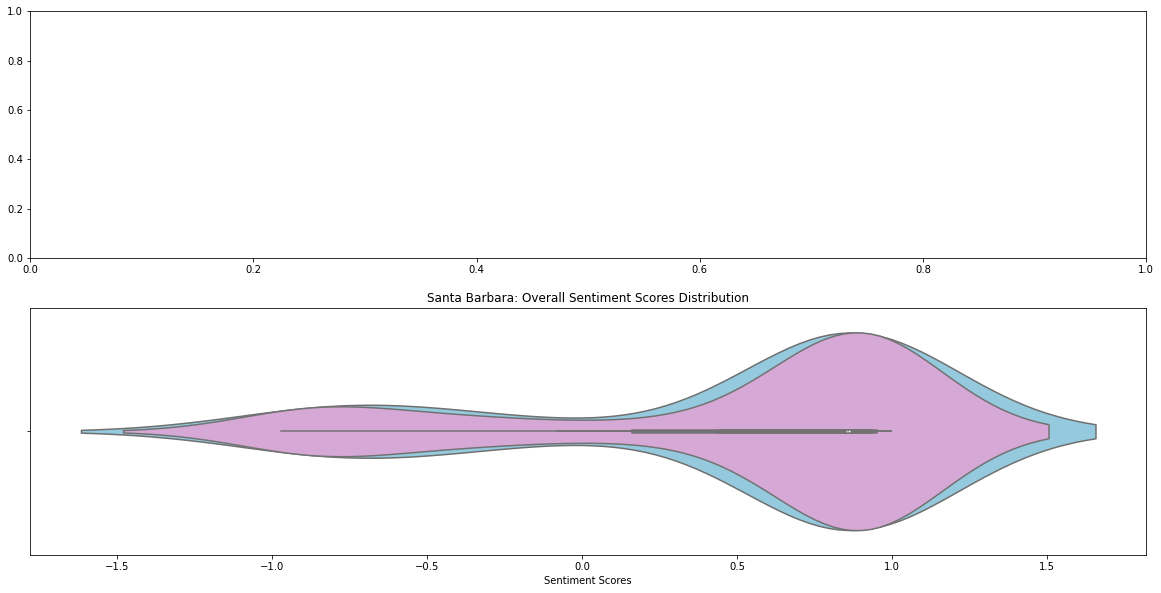

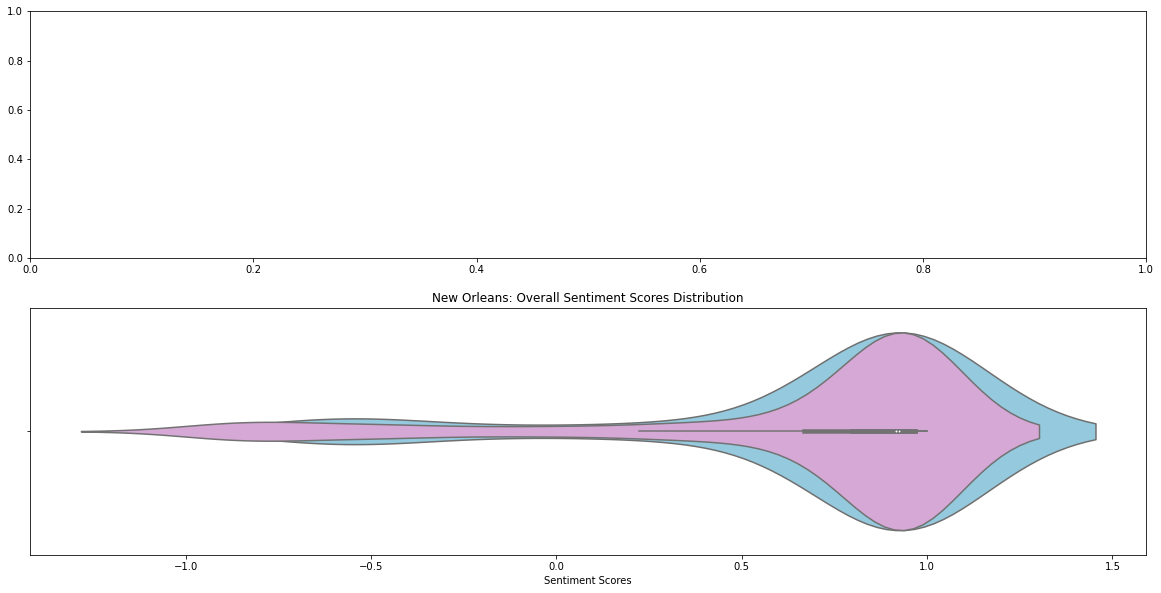

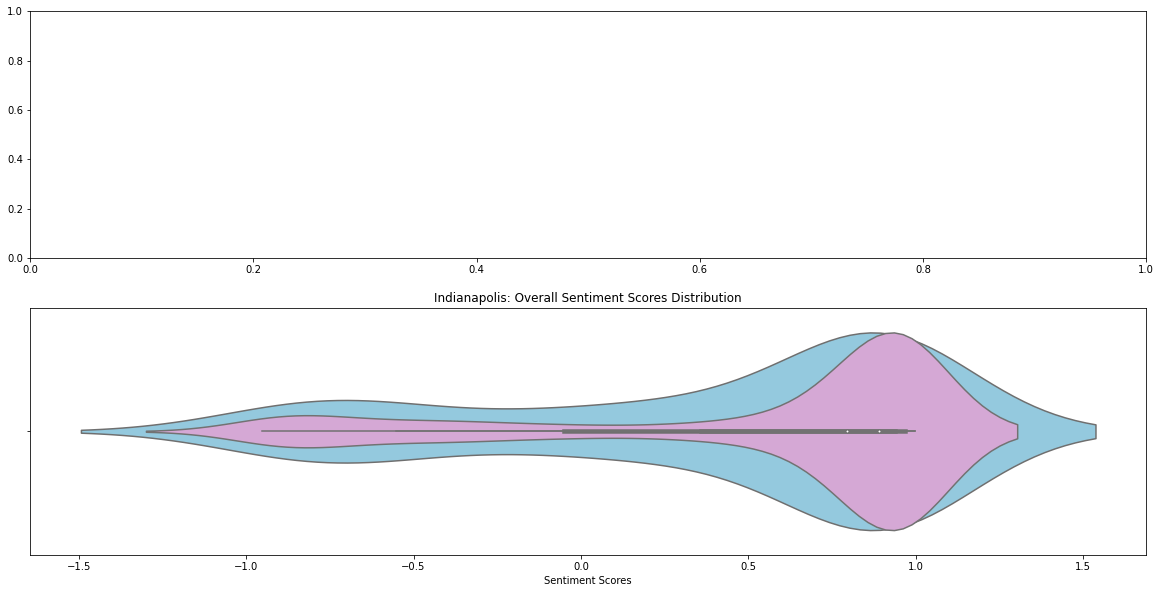

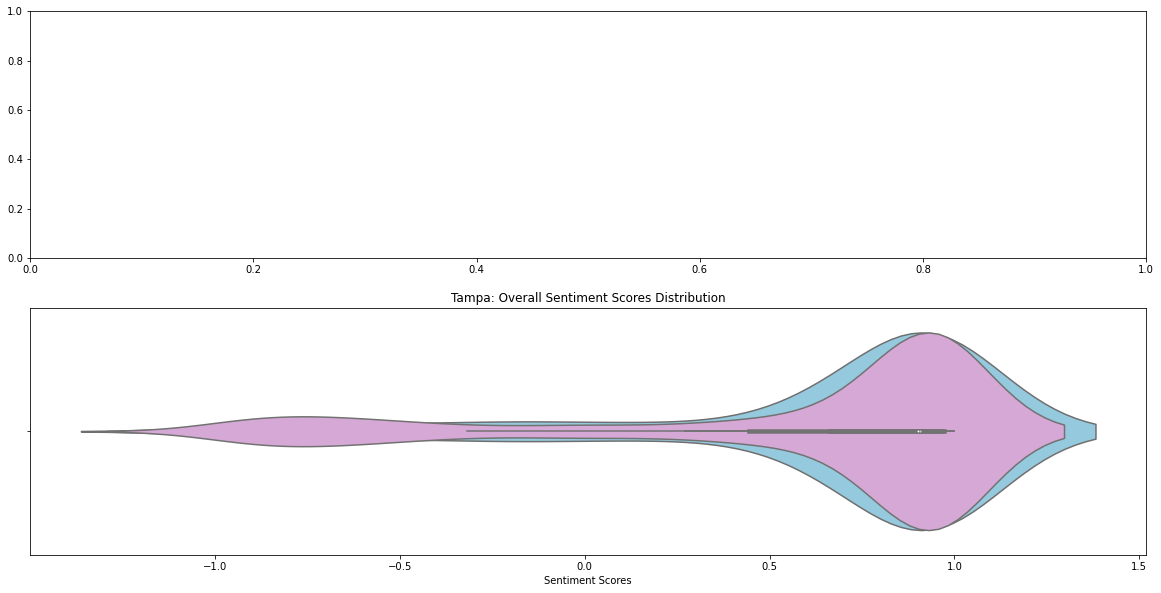

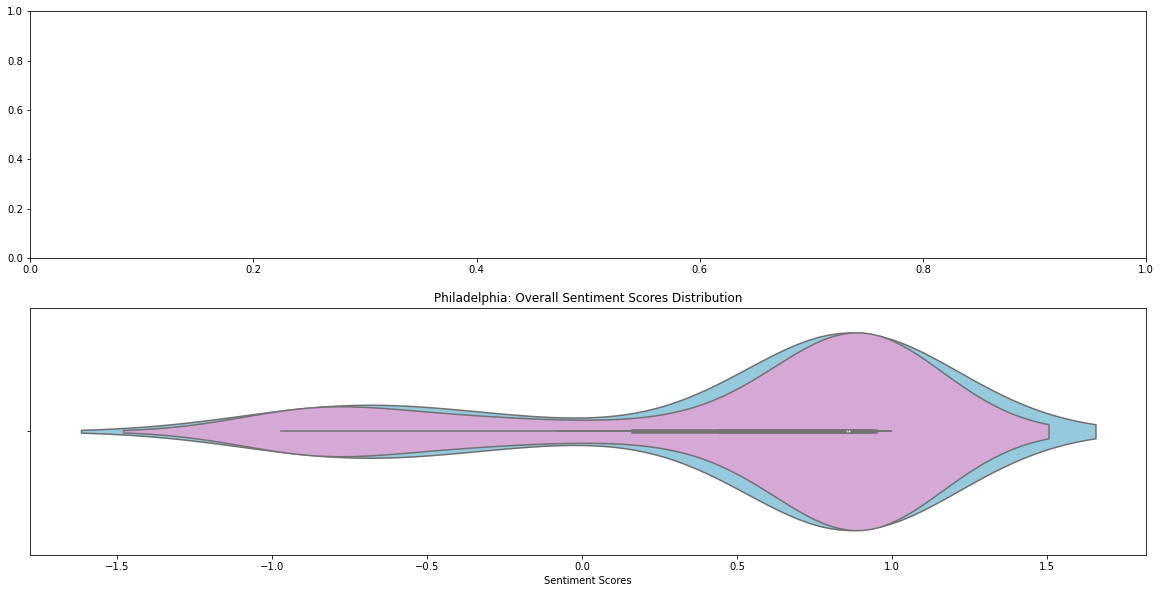

In [247]:
cities = ['sb','new_orleans', 'indianapolis', 'tampa', 'philadelphia']
x = 0
for city in cities:
    #review_f = "chinese_"city + "_review_classification.json"
    chi_data = load_json_post("chinese_" + city + "_review_classification.json")
    nchi_data = load_json_post(city + "_review_classification.json")
    
    visualize_polarity_scores(chi_data, nchi_data, x)
    x += 1
